# 2017Spring Final Project

# Attitudes Towards Immigration And Immigrants On Twitter

## Background

The United States has become a country with immigrants. Currently, there are more than 47 million people in the U.S were born outside of the U.S, which account for approximately 14% of the U.S. population (Pew Research Center, 2017). The influx of immigrants in the country has sparked public concerns about immigration's impacts on the economy, culture, and country's safety, etc. 

There are different attitudes toward immigration among the settled population. Some have more favorable attitudes towards immigration while some oppose immigration as they are concerned about labor market competition and economic burden on the government(Ceobanu & Escandell, 2010).

Past research on people's attitudes towards immigration was mainly based on surveys (Ceobanu & Escandell, 2010). Surveys are a very useful tool for collecting opinions and attitudes. However, it can be biased due to social desirability. There has been a change over the last decade in the way people share their opinions. People have been relying more on Internet-based social media, such as Twitter, to share their attitudes and opinions towards different topics. This social media activity presents a novel way to research and understand public's attitudes towards immigration.

This project explored public data on twitter about Twitter users' attitudes towards immigration and immigrant.

My research questions are:

a. What are people talking about when they are tweeting about immigration or immigrants?

b. Explore if people's opinions towards immigration and immigrants can be clustered into groups. 

c. If people have different opinions towards immigration and immigrants, are their opinion more positive or negative compare to other clusters? 

## Methods

### Data Collection

Data was collected from 9am on May 1 to 9am on May 3. Twitter Streaming API and disklistner.py (Brick, unpublished) were used to collect realtime tweets that contain hashtags including #immigrants or #immigration or words including immigrants or immigration.

### Analysis Plan

Analyese conducted include:

a. Descriptive Analyses: Use frequency table and wordcloud to show the words and hashtags that are used frequently when people are tweeting about immigration and immigrants. I am also interested in exploring the co-occurrences of words and hashtags. Ngrams were used to see what other words/topics people are talking about when they are posting their opinions on immigration and immigrants.

b. Cluster Analyses: Use hierarchical clustering and K-means clustering to identify if there are different clusters of people's attitudes towards immigration and immigrants. 

c. Use sentiment analysis to identify the sentiments of tweets in different clusters. Use Mann-Whitney test to test if sentiments of tweets differ by clusters. 


## Results

### Prepare the data for analyses

The entire JSON file is about 2.5GB. To facilitate loading, the file was split into 726 small short files. Short files were read and all English tweets were combined into a list (tweet_text) for further analyses. Please note that I used pickle package to save files in my local drive so I can still have them even my jupyter or laptop crush. 

In [ ]:
file_name_template = "Short_File_{0}.json"
tweet_text = []

for i in range(727):
    new_file = file_name_template.format(i)
    
    with open(new_file, "r") as f:
        short_tweets = json.load(f)
        print("loading {0}".format(new_file)) # Debugging
        
        for tweet in short_tweets:
            if tweet.get("lang") == "en":
                tweet_text.append(tweet.get("text"))

My data includes 340207 tweets. 

In [95]:
len(tweet_text)

340207

### Text Analysis: Hashtags

I first used Counter to get the frequency of hashtags used in tweets. Results were shown in pretty table. I then used bigrams and trigrams to demonstrate the co-occurrence of hashtags. 
Wordcloud was also used to visually show hashtags frequency.

In [2]:
# Includes:
import json
import os.path
import requests
import logging,sys

import nltk
from nltk.collocations import ngrams
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import json

import nltk
from nltk.tokenize import TweetTokenizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

import gensim
from gensim import corpora
import string

import numpy as np
import pickle

# Set up logger
logging.basicConfig(stream=sys.stdout)
logger = logging.getLogger() # Set a logger. 
logger.setLevel(logging.INFO) # Turns on info

C:\Users\weiw_\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [ ]:
file_name_template = "Short_File_{0}.json"
tag_list = []
tag_bigram = []
tag_trigram = []

for i in range(727):
    new_file = file_name_template.format(i)
    
    with open(new_file, "r") as f:
        short_tweets = json.load(f)
        print("loading {0}".format(new_file)) # Debugging
        
        for tweet in short_tweets:
            if tweet.get("lang") == "en":
                tags = tweet["entities"]["hashtags"]
                if len(tags) is 0:
                    continue  # On to next loop iteration
                # Compute Frequencies and pairs
                for idx,tag in enumerate(tags):  # Enumerate returns a tuple: (index, object) for each object in the list
                    tag_list.append(tag["text"].lower())
                    
                    for tag2 in tags[(idx+1):]:  # From (idx+1) to end--all later tags
                        a_bigram = [tag["text"].lower(), tag2["text"].lower()]   # So they're all lowercase
                        a_bigram.sort()                                          # so they're consistent
                        tag_bigram.append(tuple(a_bigram))
                    
                    for tag3 in tags[(idx+2):]:  # From (idx+2) to end--all later tags
                        a_trigram = [tag["text"].lower(), tags[(idx+1)]["text"].lower(), tag3["text"].lower()]   # So they're all lowercase
                        a_trigram.sort()                                          # so they're consistent
                        tag_trigram.append(tuple(a_trigram))

In [50]:
from collections import Counter

tag_list_count = Counter(tag_list)

tag_bigram_count = Counter(tag_bigram)

tag_trigram_count = Counter(tag_trigram)


The five hashtags used most frequently were Windrush (which is related to immigration in the UK), immigration, mayday, maga and buildthewall 

It seems that many people tweeted immigration and immigrants were talking about border safety (#buildthewall and #stopthecararven). 

For example:
Footage TODAY of Central Americans from the Caravan reaching the San Diego border "wall". The migrants are climbing the fence and cheering "Gracias, México!" The disrespect for our borders, and for our country, is beyond belief. This is an attempt at invasion. #StopTheCaravan 

To get more information about tweet contents, bigrams and trigrams were used to explore co-occurrence of words. 


In [51]:
from prettytable import PrettyTable

labels, counts = zip(*tag_list_count.most_common(25))

pt = PrettyTable()
pt.add_column("Hashtag", labels)
pt.add_column("Count", counts)
print(pt)

+---------------------+-------+
|       Hashtag       | Count |
+---------------------+-------+
|       windrush      |  4560 |
|     immigration     |  3285 |
|        mayday       |  1519 |
|         maga        |  1196 |
|     buildthewall    |  1188 |
|        brexit       |  811  |
|      immigrants     |  809  |
|         pmqs        |  765  |
| ifslaverywasachoice |  629  |
|  hostileenvironment |  607  |
|      nowelfare      |  542  |
|        trump        |  540  |
|    stopthecaravan   |  537  |
|      mandatory      |  533  |
|         daca        |  530  |
|     channel4news    |  521  |
|   windrushscandal   |  485  |
|  immigrationreform  |  471  |
|     americafirst    |  459  |
|         usa         |  385  |
|  windrushgeneration |  371  |
|      deepstate      |  371  |
|       homeless      |  370  |
|         vets        |  366  |
|       uniparty      |  365  |
+---------------------+-------+


Bigrams and trigrams showed the similar pattern. People tweeting about immigration and immigrants were most concerned about the fiscal burden immigrants put on the government (#mdatory--everify and #nowelfare) and border safety (#buildthewall and #stopthecaravan). 
For example:
It's easy to STOP THE INVASION of our sovereign country
1) #NoWelfare except to citizens
2) #Mandatory E-verify
DOJ sends 35 lawyers, 18 judges to border to stop illegal immigrant caravan. Congress must fix immigration loopholes that drain USA resources

Also, people showed concerns about how badly government treats refugees. This can be seen in the #abolishice.

For example: #AbolishICE #AbolishICE #AbolishICE #AbolishICE #AbolishICE
United States border agents routinely hold families, including infants, in freezing cells when it takes them into custody at or near the border, Human Rights Watch said in a report

In [23]:
labels, counts = zip(*tag_bigram_count.most_common(25))

pt = PrettyTable()
pt.add_column("Hashtag Bigram", labels)
pt.add_column("Count", counts)
print(pt)

+------------------------------------+-------+
|           Hashtag Bigram           | Count |
+------------------------------------+-------+
|     ('mandatory', 'nowelfare')     |  533  |
| ('buildthewall', 'stopthecaravan') |  514  |
|    ('abolishice', 'abolishice')    |  497  |
|        ('pmqs', 'windrush')        |  439  |
|    ('channel4news', 'windrush')    |  405  |
|      ('buildthewall', 'maga')      |  385  |
|     ('deepstate', 'uniparty')      |  365  |
|       ('swamp', 'uniparty')        |  365  |
|     ('nevertrump', 'uniparty')     |  365  |
|   ('fakenewsmedia', 'uniparty')    |  365  |
|     ('uniparty', 'weareawake')     |  365  |
|      ('homeless', 'uniparty')      |  365  |
|       ('deepstate', 'swamp')       |  365  |
|    ('deepstate', 'nevertrump')     |  365  |
|   ('deepstate', 'fakenewsmedia')   |  365  |
|    ('deepstate', 'weareawake')     |  365  |
|     ('deepstate', 'homeless')      |  365  |
|      ('nevertrump', 'swamp')       |  365  |
|     ('faken

In [30]:
labels, counts = zip(*tag_trigram_count.most_common(25))

pt = PrettyTable()
pt.add_column("Hashtag Trigram", labels)
pt.add_column("Count", counts)
print(pt)

+-----------------------------------------------+-------+
|                Hashtag Trigram                | Count |
+-----------------------------------------------+-------+
|   ('abolishice', 'abolishice', 'abolishice')  |  375  |
|       ('deepstate', 'swamp', 'uniparty')      |  365  |
|    ('deepstate', 'nevertrump', 'uniparty')    |  365  |
|   ('deepstate', 'fakenewsmedia', 'uniparty')  |  365  |
|    ('deepstate', 'uniparty', 'weareawake')    |  365  |
|     ('deepstate', 'homeless', 'uniparty')     |  365  |
|      ('deepstate', 'nevertrump', 'swamp')     |  365  |
|    ('deepstate', 'fakenewsmedia', 'swamp')    |  365  |
|      ('deepstate', 'swamp', 'weareawake')     |  365  |
|       ('deepstate', 'homeless', 'swamp')      |  365  |
|    ('fakenewsmedia', 'nevertrump', 'swamp')   |  365  |
|     ('nevertrump', 'swamp', 'weareawake')     |  365  |
|      ('homeless', 'nevertrump', 'swamp')      |  365  |
| ('fakenewsmedia', 'nevertrump', 'weareawake') |  365  |
|  ('fakenewsm

(-0.5, 399.5, 199.5, -0.5)

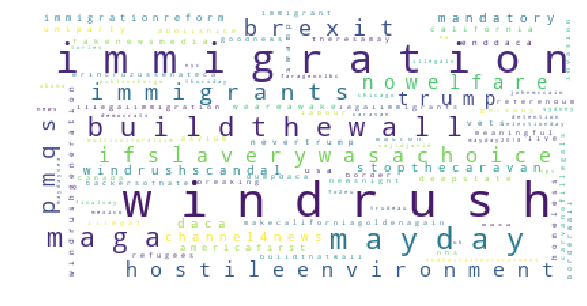

In [61]:
from wordcloud import WordCloud

tag_list_frequency = Counter([" ".join(tag) for tag in tag_list])
wordcloud = WordCloud(  background_color="white").generate_from_frequencies(tag_list_frequency)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

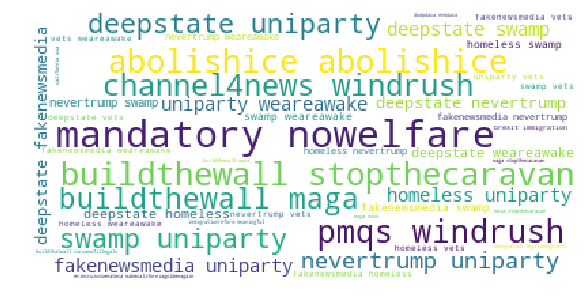

In [62]:
from wordcloud import WordCloud

tag_bigram_frequency = Counter([" ".join(tag) for tag in tag_bigram])
wordcloud = WordCloud( background_color="white").generate_from_frequencies(tag_bigram_frequency)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

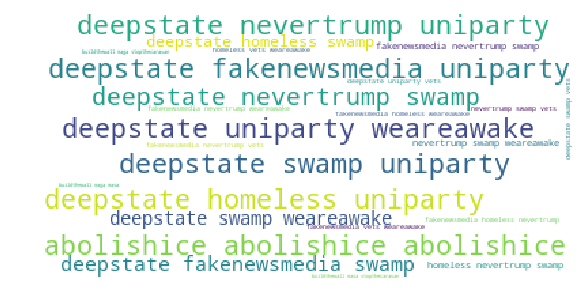

In [63]:
from wordcloud import WordCloud

tag_trigram_frequency = Counter([" ".join(tag) for tag in tag_trigram])
wordcloud = WordCloud( background_color="white").generate_from_frequencies(tag_trigram_frequency)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")

### Text Analysis: Tweet Contents

#### Preprocess texts

The codes below were used to tokenize, stop and stems words. 

In [10]:
f=open("tokens.txt","rb")
tokens=pickle.load( f)
f.close()

In [ ]:
file_name_template = "Short_File_{0}.json"
tag_list = []
tag_bigram = []
tag_trigram = []

for i in range(727):
    new_file = file_name_template.format(i)
    
    with open(new_file, "r") as f:
        short_tweets = json.load(f)
        print("loading {0}".format(new_file)) # Debugging
        
        for tweet in short_tweets:
            if tweet.get("lang") == "en":
                tags = tweet["entities"]["hashtags"]
                if len(tags) is 0:
                    continue  # On to next loop iteration
                # Compute Frequencies and pairs
                for idx,tag in enumerate(tags):  # Enumerate returns a tuple: (index, object) for each object in the list
                    tag_list.append(tag["text"].lower())
                    
                    for tag2 in tags[(idx+1):]:  # From (idx+1) to end--all later tags
                        a_bigram = [tag["text"].lower(), tag2["text"].lower()]   # So they're all lowercase
                        a_bigram.sort()                                          # so they're consistent
                        tag_bigram.append(tuple(a_bigram))
                    
                    for tag3 in tags[(idx+2):]:  # From (idx+2) to end--all later tags
                        a_trigram = [tag["text"].lower(), tags[(idx+1)]["text"].lower(), tag3["text"].lower()]   # So they're all lowercase
                        a_trigram.sort()                                          # so they're consistent
                        tag_trigram.append(tuple(a_trigram))

In [15]:
f = open('tokens', 'wb')
pickle.dump(tokens, f) 
f1 = open('vocab', 'wb')
pickle.dump(vocab, f1) 
f2 = open('corpus', 'wb')
pickle.dump(corpus, f2) 


# f = open('tokens', 'rb')
# # tokens = pickle.load(f) 
# # f1 = open('vocab', 'rb')
# # vocab = pickle.load(f1) 
# f2 = open('corpus', 'rb')
# corpus = pickle.load(f2) 

Similar to analyses of hashtags, pretty table and wordcloud were used to demonstrate word frequency and words co-occurrence.

1. Single word

In [11]:
from collections import Counter

all_text=[]
for tweet in tokens:
    for word in tweet:
        all_text.append(word)

my_count = Counter(all_text)
my_count.most_common(20)

[('immigr', 183400),
 ('illeg', 46148),
 ('choic', 29298),
 ('border', 27703),
 ('“', 27063),
 ('”', 22535),
 ('peopl', 20547),
 ('work', 19074),
 ('law', 17478),
 ('slaveri', 17055),
 ('racist', 15687),
 ('wrong', 15633),
 ('kany', 15390),
 ('invad', 15378),
 ('trump', 15267),
 ('b', 15051),
 ('job', 15012),
 ('love', 14635),
 ('offens', 14445),
 ('listen', 14444)]

The four words used most frequently were immigrant/immigration, illegal, choice, and border. It seems that many people tweeted immigration and immigrants were talking about illegal immigrants and border (probably border safety). There are also words such as work, job, law, slaveri, racist, wrong and trump, which can be relevant to immigrant and immigration. 

To get more information about tweet contents, bigrams were used to explore co-occurrence of words. 
*Please note that there are double quotes in the table. They can not be removed from the texts. Please ignore them. 

In [36]:
from prettytable import PrettyTable

labels, counts = zip(*my_count.most_common(25))

pt = PrettyTable()
pt.add_column("Word", labels)
pt.add_column("Count", counts)
print(pt)

+----------+--------+
|   Word   | Count  |
+----------+--------+
|  immigr  | 183400 |
|  illeg   | 46148  |
|  choic   | 29298  |
|  border  | 27703  |
|    “     | 27063  |
|    ”     | 22535  |
|  peopl   | 20547  |
|   work   | 19074  |
|   law    | 17478  |
| slaveri  | 17055  |
|  racist  | 15687  |
|  wrong   | 15633  |
|   kany   | 15390  |
|  invad   | 15378  |
|  trump   | 15267  |
|    b     | 15051  |
|   job    | 15012  |
|   love   | 14635  |
|  offens  | 14445  |
|  listen  | 14444  |
| democrat | 14202  |
|   want   | 14180  |
|   dead   | 13960  |
|    u     | 13909  |
| countri  | 13907  |
+----------+--------+


(-0.5, 399.5, 199.5, -0.5)

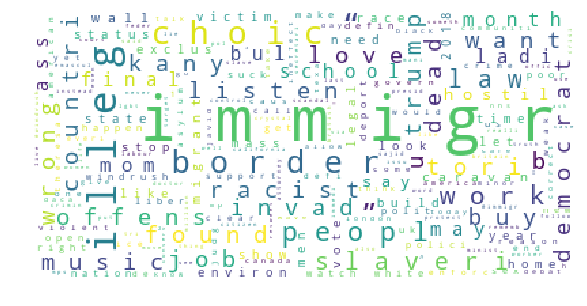

In [37]:
word_frequency = Counter([" ".join(tag) for tag in all_text])
wordcloud = WordCloud(relative_scaling=.5, background_color="white").generate_from_frequencies(word_frequency)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")

2. Ngrams

The results of bigrams showed that the two words used most frequently together were illegal immigrants. It seems that when people were tweeting about immigration and immigrants, they were concerned about illegal immigration and illegal immigrants. Slaveri choic is the second most frequent words. This is due to Kanye West's comments--"Slavery is a choice" on May 1st, which has sparked public debate. Twitter users criticised his ignorant comments and also tweeted about the differences between immigration and slavery.

For example,
 
Even white people know black history. Well, we certainly know the difference between slavery and immigration. We know slavery as a "choice" is horseshit. Looking past his color dude. He is just saying extremely ignorant things.  Oh, the quote from Harriet Tubman is a nice touch.

In [43]:
from nltk.collocations import ngrams

# Here's our sentinel word.
sentinel = 'LLLLLLLLL'
# For convenience, with spaces.
spaced_sentinel = ' ' + sentinel + ' '

# Step 1: Combine all the tokens by putting the sentinel between them.
tweet_by_token=[]
for token in tokens:
    tweet_by_token.append(' '.join(token))
    
combined_text = spaced_sentinel.join(tweet_by_token)
combined_tokens = combined_text.split()

bigrams = [n for n in ngrams(combined_tokens,2) if sentinel not in n]
bigram_frequency = Counter([" ".join(gram) for gram in bigrams])

labels, counts = zip(*bigram_frequency.most_common(25))

pt = PrettyTable()
pt.add_column("Word", labels)
pt.add_column("Count", counts)
print(pt)

+----------------+-------+
|      Word      | Count |
+----------------+-------+
|  illeg immigr  | 32989 |
| slaveri choic  | 15077 |
|    immigr ”    | 14355 |
|    “ immigr    | 14006 |
|   dead wrong   | 13673 |
|  choic choic   | 13669 |
|  listen music  | 13669 |
|  choic listen  | 13668 |
|   kany dead    | 13667 |
|  wrong offens  | 13667 |
| offens slaveri | 13667 |
|   music buy    | 13662 |
|     buy b      | 13650 |
|    ” invad     | 13446 |
|   racist ass   | 12479 |
|  work school   | 12473 |
|    ass ladi    | 12447 |
|    mom work    | 12442 |
|    job love    | 12438 |
|  love racist   | 12432 |
|  school month  | 12431 |
|  month final   | 12431 |
|  final found   | 12431 |
|   found job    | 12431 |
|    ladi bul    | 12430 |
+----------------+-------+


(-0.5, 399.5, 199.5, -0.5)

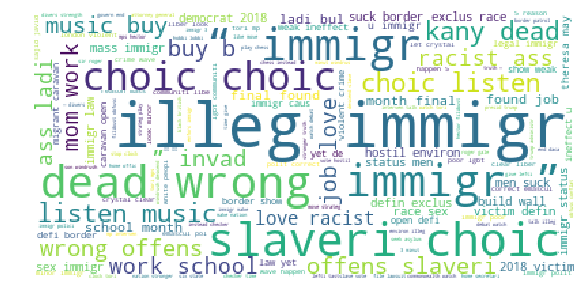

In [46]:
wordcloud = WordCloud(relative_scaling=.5, background_color="white").generate_from_frequencies(bigram_frequency)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")

In [45]:
trigrams = [n for n in ngrams(combined_tokens,3) if sentinel not in n]
trigram_frequency = Counter([" ".join(gram) for gram in trigrams])

labels, counts = zip(*trigram_frequency.most_common(25))

pt = PrettyTable()
pt.add_column("Word", labels)
pt.add_column("Count", counts)
print(pt)

+----------------------+-------+
|         Word         | Count |
+----------------------+-------+
|   kany dead wrong    | 13667 |
|  dead wrong offens   | 13667 |
| wrong offens slaveri | 13667 |
| offens slaveri choic | 13667 |
| slaveri choic choic  | 13667 |
|  choic choic listen  | 13667 |
|  choic listen music  | 13665 |
|   listen music buy   | 13662 |
|     music buy b      | 13650 |
|      “ immigr ”      | 13522 |
|    immigr ” invad    | 13445 |
|   mom work school    | 12437 |
|   racist ass ladi    | 12435 |
|  work school month   | 12431 |
|  school month final  | 12431 |
|  month final found   | 12431 |
|   final found job    | 12431 |
|    found job love    | 12431 |
|   job love racist    | 12431 |
|   love racist ass    | 12431 |
|     ass ladi bul     | 12430 |
|  defin exclus race   |  7886 |
| democrat 2018 victim |  7885 |
|  2018 victim defin   |  7885 |
| victim defin exclus  |  7885 |
+----------------------+-------+


(-0.5, 399.5, 199.5, -0.5)

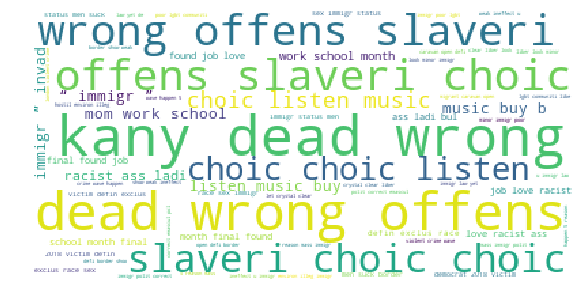

In [47]:
wordcloud = WordCloud(relative_scaling=.5, background_color="white").generate_from_frequencies(trigram_frequency)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")

### Similarity Analysis: Clustering

Hierarchical clustering and K-means clustering were used to explore the clustering structure in the data.
*Note: Everytime I run clustering analysis, I received a warning of memory error and could not proceed. This may be due to my laptop's limited computational capacity. Therefore, I randomly selected a subsample of 40000 tweets from the original 340206 tweet to run clustering analysis.I used doc2vec to represent all the sampled documents.

In [9]:
idx = np.random.choice(range(340206), 40000, replace=False)
vec_array_sample = vec_array[idx, :]

In [10]:
vec_array_sample.shape

(40000, 100)

##### 1. Hierachical clustering

In [ ]:
from scipy.cluster.hierarchy import ward,dendrogram

# Compute distances
distmat = 1-np.array(index)

# Linkage is the process of combining elements into clusters
linkage = ward(distmat)

In [ ]:
import gensim
from gensim.models.doc2vec import TaggedDocument

tagged = []
for idx, tok in enumerate(tokens):
    td = TaggedDocument(tok, ["Doc_"+str(idx)])
    tagged.append(td)

tag_model = gensim.models.Doc2Vec(tagged, dm = 0, window=5, 
                                        alpha=.025, min_alpha=.025, 
                                        vector_size=100, min_count=0)

for epoch in range(10):
    print("Epoch {0}".format(epoch))
    tag_model.alpha -=.002
    tag_model.min_alpha = tag_model.alpha
    tag_model.train(tagged, total_examples=tag_model.corpus_count,
                   epochs=tag_model.epochs)

In [ ]:
fig = plt.figure(figsize=(20,10))

fig = dendrogram(linkage, orientation="left")
plt.show() 

In [40]:
tag_model["Doc_340206"]

array([-1.94142267e-01,  1.19455520e-03, -1.95610523e-01, -9.64376703e-02,
       -3.70647192e-01, -2.75479704e-01, -2.19953641e-01,  5.05056798e-01,
       -2.36261144e-01, -5.26251420e-02, -1.81088582e-01,  3.20954353e-01,
        3.64767446e-04,  2.17388824e-01,  3.09756160e-01, -8.45581368e-02,
        1.77644476e-01,  6.75477535e-02, -3.91838439e-02, -2.70739019e-01,
        7.74970874e-02, -1.05332389e-01, -1.48390941e-02,  1.29118457e-01,
        3.29821594e-02, -1.29597142e-01,  9.43760946e-02, -1.77700847e-01,
        3.77557993e-01, -8.09903592e-02, -1.89514443e-01,  2.67710537e-01,
        1.06596164e-01,  2.19634011e-01,  2.61806622e-02,  6.52360991e-02,
       -3.31568532e-02, -1.57919124e-01, -2.82152463e-02, -1.44309670e-01,
       -1.40917987e-01, -4.74153496e-02,  3.22893828e-01,  1.45062909e-01,
        9.40425843e-02,  1.84049420e-02, -1.43751964e-01, -3.57620977e-02,
       -1.02342037e-03, -8.02599117e-02,  3.91228013e-02, -2.06709318e-02,
        3.44840378e-01,  

In [47]:
import numpy as np 

name_list = []
vec_array = np.ndarray(shape=[340206,100])
for i in range(340206):
    new_name = "Doc_"+str(i)
    name_list.append(new_name)
    a_vector = tag_model.docvecs[new_name]
    vec_array[i,] = a_vector

In [15]:
from scipy.spatial.distance import pdist

distmat = pdist(vec_array_sample)


In [25]:
from scipy.cluster.hierarchy import ward,dendrogram

linkage = ward(distmat)

In [12]:
name_list_sample=["Doc_"+str(i) for i in idx]

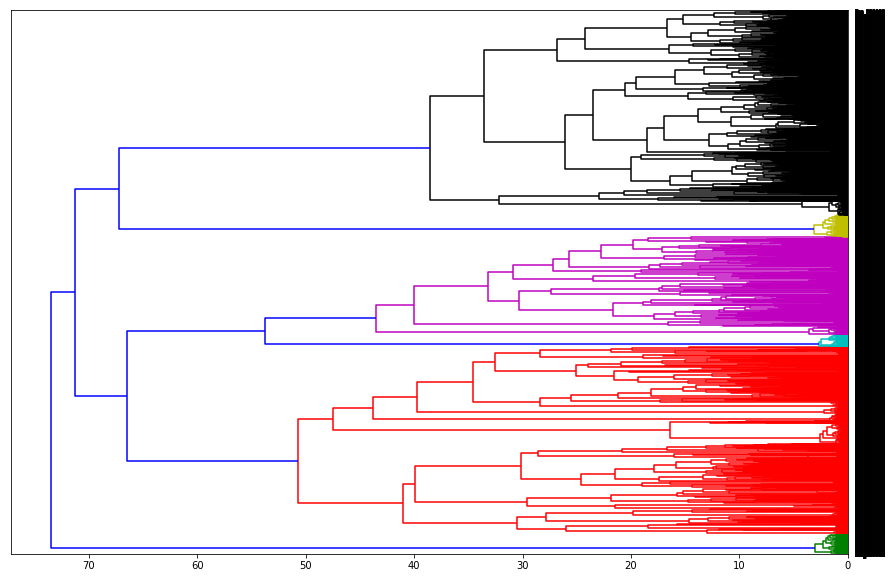

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15,10))

fig = dendrogram(linkage, orientation="left", labels=name_list_sample, show_leaf_counts=True)

Based on the dendrogram, it seems that there are five clusters. 
K-means clustering was used to confirm the number of clusters.

##### 2. K-means Clustering

K-means clustering was conducted to confirm the cluster structrue among tweets. Sillhouette scores were used to check if five clusters are a good solution. 
*Please note that I also tried three clusters.

In [34]:
n_clusters = 5

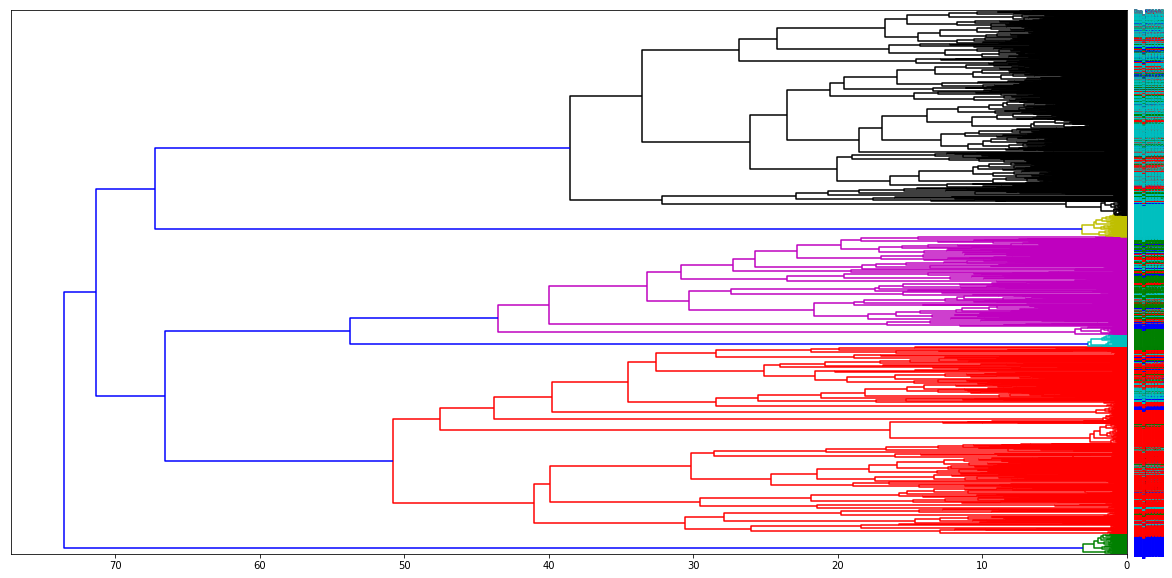

In [45]:
from sklearn.cluster import KMeans

kmc = KMeans(n_clusters)
preds = kmc.fit_predict(vec_array_sample)  # returns the N-means clustering solution
label_colors = {}
colors = ['b','g','r','c','m','y','k']

for i in range(len(name_list_sample)):
    if len(name_list_sample[i]) > 0:
        label_colors[name_list_sample[i]] = colors[preds[i]]

fig = plt.figure(figsize=(20,10))

fig = dendrogram(linkage, orientation="left", labels=name_list_sample)

ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
for lbl in xlbls:
     lbl.set_color(label_colors[lbl.get_text()])

plt.show()

In [16]:
from scipy.cluster.hierarchy import ward,dendrogram

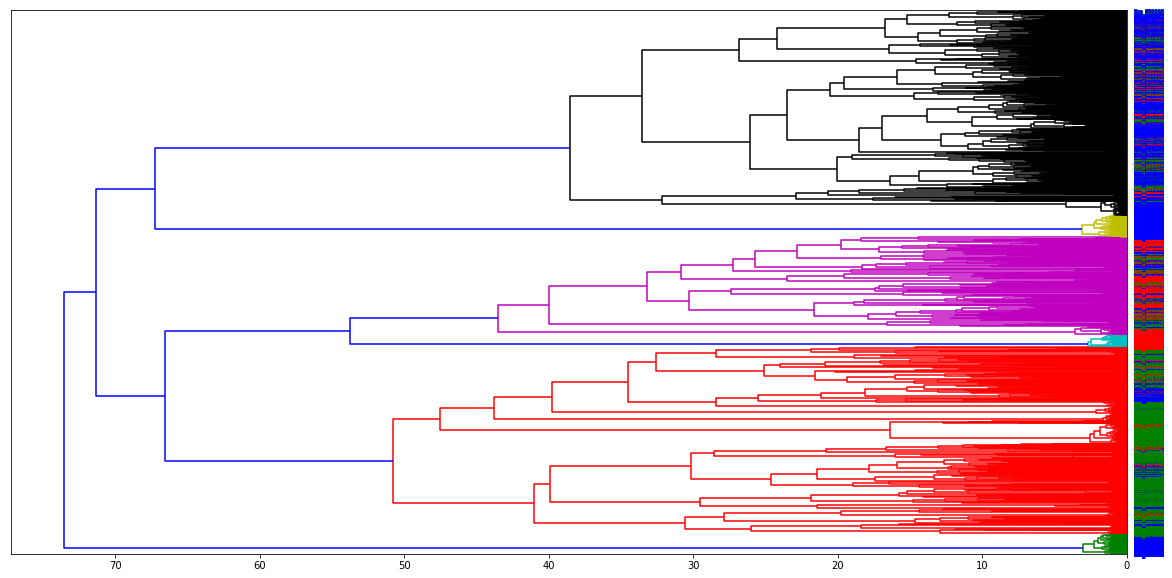

In [17]:
from sklearn.cluster import KMeans

n_clusters=3

kmc = KMeans(n_clusters)
preds = kmc.fit_predict(vec_array_sample)  # returns the N-means clustering solution
label_colors = {}
colors = ['b','g','r','c','m','y','k']

for i in range(len(name_list_sample)):
    if len(name_list_sample[i]) > 0:
        label_colors[name_list_sample[i]] = colors[preds[i]]

fig = plt.figure(figsize=(20,10))

fig = dendrogram(linkage, orientation="left", labels=name_list_sample)

ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
for lbl in xlbls:
     lbl.set_color(label_colors[lbl.get_text()])

plt.show()

In [46]:
from sklearn import metrics

def help_select_k_means(data_vectors, min_clusters=2, 
                           max_clusters=50, cluster_step = 5):
    """Computes silhouette distance for a suite of cluster sizes, 
        and plots the result."""
    
    silhouettes = []
    cluster_counts = []
    
    for n_clusters in range(min_clusters, max_clusters, cluster_step):
        assignments = KMeans(n_clusters).fit_predict(data_vectors)
        cluster_counts.append(n_clusters)
        # We have to change to euclidean distance scores for silhouettes
        silhouettes.append(metrics.silhouette_score(X=data_vectors, 
                                                    metric="euclidean", 
                                                    labels=assignments))
    plt.plot(cluster_counts, silhouettes)
    plt.title("Silhouette Scores!")
    plt.show()

Silhouette scores.

In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans

silhouettes = []
cluster_counts = []

assignments = KMeans(2).fit_predict(vec_array_sample)
cluster_counts.append(2)
# We have to change to euclidean distance scores for silhouettes
silhouettes.append(metrics.silhouette_score(X=vec_array_sample, metric="euclidean", labels=assignments))


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.cluster import KMeans
import numpy as np

In [3]:
n_clusters=5
kmc = KMeans(n_clusters)
preds = kmc.fit_predict(vec_array_sample)

In [4]:
import matplotlib.cm as cm
from sklearn import metrics

def draw_silhouette(X, n_clusters, cluster_labels, clusterer=None):
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(X, cluster_labels)

    # Build two subplots for each plot
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)  # Another way to set sizes: in physical units

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot shows the first two dimensions of the predictor space.
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    if clusterer is not None:
        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

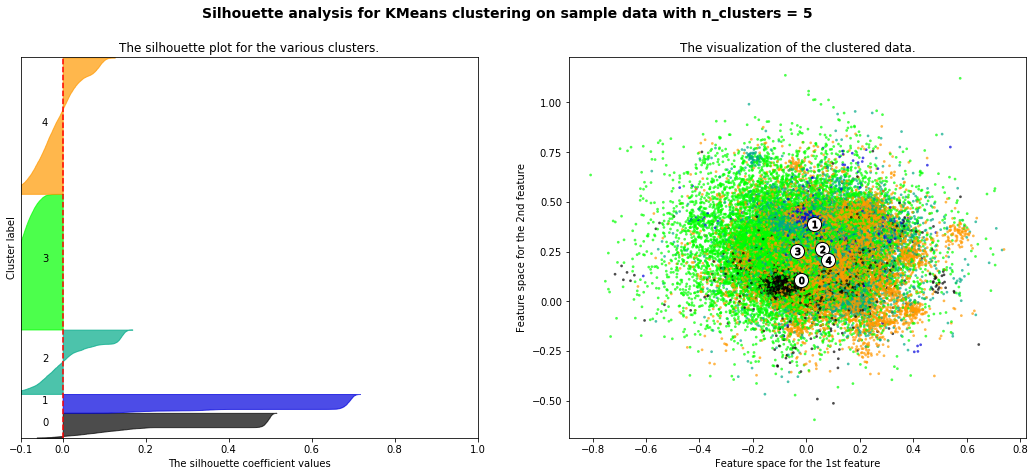

In [11]:
# Build two subplots for each plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)  # Another way to set sizes: in physical units

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot shows the first two dimensions of the predictor space.
colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

if clusterer is not None:
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % n_clusters),
             fontsize=14, fontweight='bold')

plt.show()

As shown in the silhouette coefficient values figure, some clusters even have negative value, which suggested that they were assigned to a wrong cluster. Moreover, according to the feature space, it seems that there are no clear-cut clusters. Based on these, I concluded that there is no clear clustering structure in the collected tweets, which suggested that people's attitudes towards immigration and immigrant are complicated and mixed.

### Sentiment Analysis

My original plan was to conduct sentiment analysis by clusters. As I did not find clear clusters, I compared the sentiment of the tweets about illegal immigrants vs all the other tweets. My hypothesis was that tweets contain illegal immigrants have a higher negative score. 

In [97]:
from scipy.stats import mannwhitneyu

topic = "illegal"

grp1 = [sid.polarity_scores(tweet).get("compound") for tweet in tweet_text if topic.lower() in tweet.lower()]
grp2 = [sid.polarity_scores(tweet).get("compound") for tweet in tweet_text if topic.lower() not in tweet.lower()]
print(mannwhitneyu(grp1, grp2, alternative="two-sided"))
print(mannwhitneyu(grp1, grp2, alternative="less"))
print(mannwhitneyu(grp1, grp2, alternative="greater"))

MannwhitneyuResult(statistic=4314966509.5, pvalue=0.0)
MannwhitneyuResult(statistic=4314966509.5, pvalue=0.0)
MannwhitneyuResult(statistic=4314966509.5, pvalue=1.0)


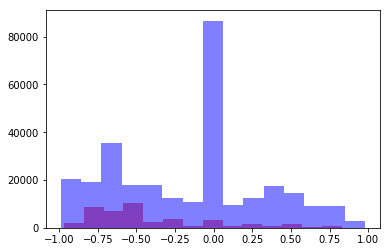

In [80]:
plt.hist(grp1, 15, color="red", alpha=.5)
plt.hist(grp2, 15, color="blue", alpha=.5)
plt.show()

Mann-Whitney U test showed that tweets contained "illegal" have higher negative scores than all the other tweets, which suggested that people have more negative attitudes towards illegal immigrants compared to their opinions towards other immigration-related topics.

In [82]:
grp1_neg = [sid.polarity_scores(tweet).get("neg") for tweet in tweet_text if topic.lower() in tweet.lower()]
grp2_neg = [sid.polarity_scores(tweet).get("neg") for tweet in tweet_text if topic.lower() not in tweet.lower()]
print(mannwhitneyu(grp1_neg, grp2_neg, alternative="two-sided"))
print(mannwhitneyu(grp1_neg, grp2_neg, alternative="greater"))

MannwhitneyuResult(statistic=9414631443.0, pvalue=0.0)
MannwhitneyuResult(statistic=9414631443.0, pvalue=0.0)


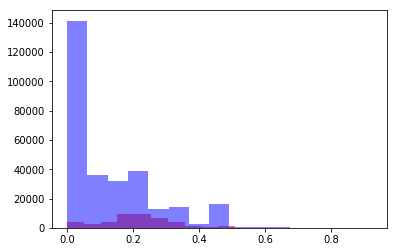

In [83]:
plt.hist(grp1_neg, 15, color="red", alpha=.5)
plt.hist(grp2_neg, 15, color="blue", alpha=.5)
plt.show()

### LDA Topic Modeling

LDA was conducted to find different topics in the collected tweets. 
I first tried 5 topics to get a sense of the data. 
Then I used topic coherence to measure how well each topic is connected with itself to find the best option for the number of topics.

In [ ]:
from gensim.models import ldamodel
tweet_lda_5topic = ldamodel.LdaModel(corpus, num_topics=5, id2word = vocab, passes=20)

In [91]:
tweet_lda_5topic.print_topics(num_topics=5, num_words=10)

INFO:gensim.models.ldamodel:topic #0 (0.200): 0.059*"immigr" + 0.034*"“" + 0.029*"”" + 0.017*"time" + 0.014*"may" + 0.013*"uk" + 0.011*"tori" + 0.010*"trump" + 0.009*"plan" + 0.009*"theresa"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.027*"choic" + 0.017*"judg" + 0.017*"immigr" + 0.017*"offens" + 0.016*"wrong" + 0.016*"—" + 0.015*"wall" + 0.015*"dead" + 0.015*"b" + 0.015*"slaveri"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.109*"immigr" + 0.055*"border" + 0.033*"u" + 0.033*"democrat" + 0.032*"invad" + 0.025*"law" + 0.019*"status" + 0.019*"show" + 0.019*"exclus" + 0.018*"men"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.030*"immigr" + 0.021*"legal" + 0.020*"trump" + 0.014*"peopl" + 0.014*"support" + 0.013*"happen" + 0.011*"mass" + 0.010*"year" + 0.010*"work" + 0.010*"countri"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.080*"immigr" + 0.050*"illeg" + 0.017*"stop" + 0.016*"vote" + 0.015*"windrush" + 0.014*"want" + 0.013*"hostil" + 0.011*"make" + 0.011*"environ" + 0.011*"nat

[(0,
  '0.059*"immigr" + 0.034*"“" + 0.029*"”" + 0.017*"time" + 0.014*"may" + 0.013*"uk" + 0.011*"tori" + 0.010*"trump" + 0.009*"plan" + 0.009*"theresa"'),
 (1,
  '0.027*"choic" + 0.017*"judg" + 0.017*"immigr" + 0.017*"offens" + 0.016*"wrong" + 0.016*"—" + 0.015*"wall" + 0.015*"dead" + 0.015*"b" + 0.015*"slaveri"'),
 (2,
  '0.109*"immigr" + 0.055*"border" + 0.033*"u" + 0.033*"democrat" + 0.032*"invad" + 0.025*"law" + 0.019*"status" + 0.019*"show" + 0.019*"exclus" + 0.018*"men"'),
 (3,
  '0.030*"immigr" + 0.021*"legal" + 0.020*"trump" + 0.014*"peopl" + 0.014*"support" + 0.013*"happen" + 0.011*"mass" + 0.010*"year" + 0.010*"work" + 0.010*"countri"'),
 (4,
  '0.080*"immigr" + 0.050*"illeg" + 0.017*"stop" + 0.016*"vote" + 0.015*"windrush" + 0.014*"want" + 0.013*"hostil" + 0.011*"make" + 0.011*"environ" + 0.011*"nation"')]

In [93]:
from gensim.models import CoherenceModel
coherence_model_5topic = CoherenceModel(model=tweet_lda_5topic, texts=tokens,
                                        dictionary=vocab, coherence='c_v')

print('\nCoherence Score, 5-topic: ', coherence_model_5topic.get_coherence())

INFO:gensim.topic_coherence.probability_estimation:using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO:gensim.topic_coherence.text_analysis:3 accumulators retrieved from output queue
INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 308270 virtual documents

Coherence Score, 5-topic:  0.2448553821357426


Topic coherance was used to get the best number of topics. According to the figure below, 14- or 18-topic model have higher coherance scores. 

In [ ]:
coherence = []
for i in range(6,20):
    tweet_lda = ldamodel.LdaModel(corpus, num_topics=i, id2word = vocab, passes = 20)
    coherence.append(CoherenceModel(model=tweet_lda, texts=tokens,
                                        dictionary=vocab, coherence='c_v').get_coherence())

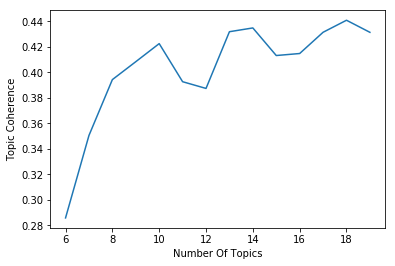

In [102]:
# plot to choose number of topics
plt.plot(range(6,20), coherence)
 
# naming the x axis
plt.xlabel('Number Of Topics')
# naming the y axis
plt.ylabel('Topic Coherence')

plt.show()

In [106]:
logger.setLevel(logging.WARN)  # Silence the LDAmodel a bit.
tweet_lda_14topic = ldamodel.LdaModel(corpus, num_topics=14, id2word = vocab, passes=20)

In [107]:
logger.setLevel(logging.WARN)  # Silence the LDAmodel a bit.
tweet_lda_18topic = ldamodel.LdaModel(corpus, num_topics=18, id2word = vocab, passes=20)

From the topics listed below, topic 13 seems to be not directly related to immigrants and immigration. Other topics are about different aspects of immigration. For example, the first topic may deals with illegal immigrants and border safety and the third topic may be about Trump, ICE and deporting illegal or violent immigrants.

In [108]:
tweet_lda_14topic.print_topics(num_topics=14, num_words=10)

[(0,
  '0.156*"immigr" + 0.121*"border" + 0.077*"illeg" + 0.056*"law" + 0.055*"u" + 0.042*"show" + 0.038*"cut" + 0.033*"retweet" + 0.024*"migrant" + 0.023*"caravan"'),
 (1,
  '0.039*"truth" + 0.034*"trump" + 0.034*"presid" + 0.025*"go" + 0.021*"hobbi" + 0.020*"mexico" + 0.020*"asylum" + 0.020*"pol" + 0.019*"offic" + 0.016*"make"'),
 (2,
  '0.089*"trump" + 0.050*"immigr" + 0.038*"defin" + 0.036*"10" + 0.035*"illeg" + 0.034*"deport" + 0.034*"violent" + 0.032*"slave" + 0.029*"descend" + 0.027*"ice"'),
 (3,
  '0.050*"immigr" + 0.046*"windrush" + 0.043*"vote" + 0.031*"may" + 0.026*"uk" + 0.026*"new" + 0.025*"exclus" + 0.024*"home" + 0.024*"javid" + 0.022*"let"'),
 (4,
  '0.140*"immigr" + 0.049*"illeg" + 0.043*"support" + 0.039*"invad" + 0.023*"men" + 0.022*"offens" + 0.020*"california" + 0.016*"wave" + 0.016*"hispan" + 0.015*"tori"'),
 (5,
  '0.038*"choic" + 0.031*"stop" + 0.030*"want" + 0.027*"immigr" + 0.025*"nation" + 0.023*"know" + 0.023*"citizen" + 0.023*"black" + 0.023*"wrong" + 0.023

With the 18-topic model, we can identify more topics that are not directely related to immigrants and immigration, such as topic 4, 6, and 9.

In [109]:
tweet_lda_18topic.print_topics(num_topics=18, num_words=10)

[(0,
  '0.055*"mass" + 0.048*"peopl" + 0.041*"citizen" + 0.041*"wrong" + 0.040*"3" + 0.038*"british" + 0.037*"reason" + 0.031*"2" + 0.022*"white" + 0.020*"mani"'),
 (1,
  '0.104*"immigr" + 0.057*"illeg" + 0.049*"hostil" + 0.040*"environ" + 0.032*"crime" + 0.030*"polit" + 0.029*"javid" + 0.027*"let" + 0.025*"retweet" + 0.023*"sajid"'),
 (2,
  '0.131*"trump" + 0.079*"support" + 0.059*"happen" + 0.045*"presid" + 0.033*"deport" + 0.033*"violent" + 0.030*"state" + 0.026*"unit" + 0.026*"ice" + 0.022*"patriot"'),
 (3,
  '0.111*"invad" + 0.048*"destroy" + 0.037*"fund" + 0.037*"session" + 0.034*"brit" + 0.033*"found" + 0.025*"congress" + 0.024*"prosecutor" + 0.020*"stuf" + 0.018*"sever"'),
 (4,
  '0.051*"say" + 0.045*"men" + 0.043*"race" + 0.036*"kany" + 0.035*"buy" + 0.034*"problem" + 0.034*"1" + 0.029*"hobbi" + 0.024*"#maga" + 0.022*"blame"'),
 (5,
  '0.095*"choic" + 0.067*"work" + 0.052*"b" + 0.045*"racist" + 0.044*"son" + 0.030*"mp" + 0.030*"shit" + 0.027*"hard" + 0.022*"toxic" + 0.019*"imm

In [113]:
probs = tweet_lda_14topic.get_document_topics(corpus, minimum_probability=None)
for i in range(5):
    print(tweet_text[i])
    print("             Probs:", probs[i])

RT @davidschneider: May: “I stand by my hostile environment policy. This country wants to take action against illegal immigrants*.”

*inclu…
             Probs: [(3, 0.08270888), (7, 0.7204105), (11, 0.07802109), (12, 0.07124036)]
RT @JamesMelville: The tragic irony of Britain colonising almost half of the entire planet but then voting to leave the EU because voters w…
             Probs: [(3, 0.06180302), (10, 0.07653061), (11, 0.8055439)]
RT @JimKilbane: Is the #GOP at risk of losing #Catholics?  https://t.co/3EVHvTIjCm
             Probs: [(0, 0.014285715), (1, 0.014285715), (2, 0.21428597), (3, 0.014285715), (4, 0.21428585), (5, 0.014285715), (6, 0.014285715), (7, 0.014285715), (8, 0.014285715), (9, 0.21428505), (10, 0.014285715), (11, 0.21428597), (12, 0.014285715), (13, 0.014285715)]
RT @PKsbpdl: You are the Commander in Chief. Make an Executive Order demanding our government #BuildTheWallNow 
Do SOMETHING!!! https://t.c…
             Probs: [(1, 0.60477936), (8, 0.2095063), (12,

In [114]:
probs = tweet_lda_18topic.get_document_topics(corpus, minimum_probability=None)
for i in range(5):
    print(tweet_text[i])
    print("             Probs:", probs[i])

RT @davidschneider: May: “I stand by my hostile environment policy. This country wants to take action against illegal immigrants*.”

*inclu…
             Probs: [(1, 0.21562393), (7, 0.06517469), (12, 0.073662035), (14, 0.14060302), (15, 0.45678812)]
RT @JamesMelville: The tragic irony of Britain colonising almost half of the entire planet but then voting to leave the EU because voters w…
             Probs: [(2, 0.1468254), (7, 0.07539682), (11, 0.5774242), (16, 0.14479801)]
RT @JimKilbane: Is the #GOP at risk of losing #Catholics?  https://t.co/3EVHvTIjCm
             Probs: [(0, 0.011111111), (1, 0.011111111), (2, 0.011111111), (3, 0.011111111), (4, 0.011111111), (5, 0.011111111), (6, 0.011111111), (7, 0.21111111), (8, 0.011111111), (9, 0.21111111), (10, 0.011111111), (11, 0.011111111), (12, 0.011111111), (13, 0.41111112), (14, 0.011111111), (15, 0.011111111), (16, 0.011111111), (17, 0.011111111)]
RT @PKsbpdl: You are the Commander in Chief. Make an Executive Order demanding our gov

## Conclusion

This project explored people's attitudes towards immigrants and immigration using twitter data. In this project, I collected 340207 tweets and conducted frequency analyses, bigrams, trigrams, clustering analyses, sentiment analyses and LDA. The results indicated that, when people tweet about immigrants and immigration, they are more likely to talk about illegal immigrants, border safety and fiscal burden on the country. 

Clustering results suggested that there are no clear clusters in the collected tweets. This may be due to the complex nature of people's attitudes and opinions. 

Sentiment analysis indicated that tweets containing "illegal" had significantly higher negative emotions than all the other tweets. The reason for this may be complicated. People may be against illegal immigration because it violates laws. People can also be concerned about the country's safety because it is harder to track who they were and what they will do if they come to the country without permison and documents. Moreover, people who were legal immigrants may be anti-illegal immigrants as they feel that it is unfair.